In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import math


In [15]:
def read_csv_in_chunks(path, n_lines, **read_params):
    if 'chunksize' not in read_params or read_params['chunksize'] < 1:
        read_params['chunksize'] = 80000

    chunks = [0] * math.ceil(n_lines / read_params['chunksize'])

    for i, chunk in enumerate(pd.read_csv(path, **read_params)):
        percent = min(
            ((i + 1) * read_params['chunksize'] / n_lines) * 100, 100.0)
        print("#" * int(percent), f"{percent:.2f}%", end='\r', flush=True)
        chunks[i] = chunk

    print()
    print("Now concatenating chunks...")
    df = pd.concat(chunks, axis=0)
    del chunks
    print("Finished!")
    return df


In [23]:
gazetteerpath = 'data/nga/Countries.txt'


df = read_csv_in_chunks(
    path=gazetteerpath,
    n_lines=13516708,
    delimiter="\t",
    low_memory=False
)


#################################################################################################### 100.00%
Now concatenating chunks...
Finished!


In [ ]:

placenames = df.name.tolist()
print(placenames[:5])


In [11]:

with open(gazetteerpath, "r") as wiki:
    lines = wiki.readlines()
words = []
for line in lines:
    print(line)
    break
    words.extend(line.strip().split(" "))


RC	UFI	UNI	LAT	LONG	DMS_LAT	DMS_LONG	MGRS	JOG	FC	DSG	PC	CC1	ADM1	POP	ELEV	CC2	NT	LC	SHORT_FORM	GENERIC	SORT_NAME_RO	FULL_NAME_RO	FULL_NAME_ND_RO	SORT_NAME_RG	FULL_NAME_RG	FULL_NAME_ND_RG	NOTE	MODIFY_DATE	DISPLAY	NAME_RANK	NAME_LINK	TRANSL_CD	NM_MODIFY_DATE	F_EFCTV_DT	F_TERM_DT



In [3]:
geo = gpd.read_file("data/geodataframes/places_reformation_wiki_DE.geojson")
ax = geo.plot()
# ax.set_xlim(50, 80)
# ax.set_ylim(20, 45)
cx.add_basemap(
    ax,
    crs=geo.crs)
    # zoom=8,
    # source=cx.providers.Stamen.Watercolor
plt.show()

<AxesSubplot:>

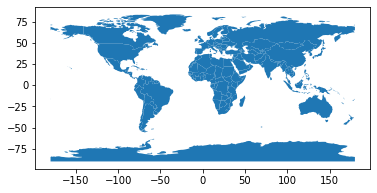

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()
world.plot()

/var/folders/8d/zq1l7swj0gvchyw4v8wrylkm0000gn/T/ipykernel_9847/716092020.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world["centroid_column"] = world.centroid


<AxesSubplot:>

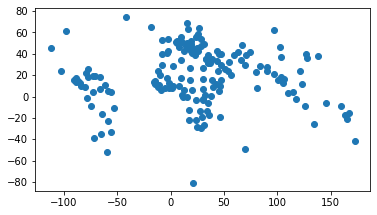

In [25]:
world["centroid_column"] = world.centroid
(
    world
        .rename(columns={'geometry': 'borders'})
        .set_geometry('borders')
        .set_geometry('centroid_column')
)

world.plot()
